### Airline Satisfaction EDA
- 103,000 entries
- 19  numerical columns
- 5 categorical columns


In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 25)

%matplotlib inline

In [330]:
#reading in csv, and setting index column
df= pd.read_csv('train.csv', index_col=0)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [332]:
df.shape

(103904, 24)

In [333]:
column_names= df.columns
print(column_names)

df.dtypes

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [334]:
len(df.columns)

24

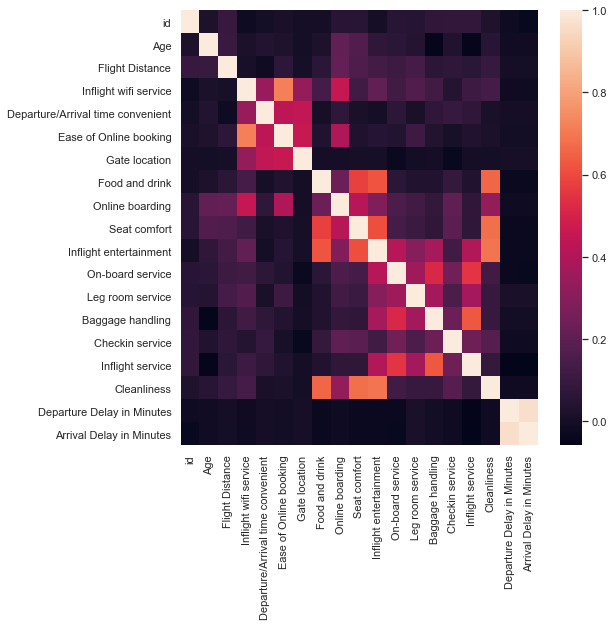

In [335]:
sns.set(rc={'figure.figsize':(8, 8)})

sns.heatmap(df.corr());

In [336]:
58668/1440

40.74166666666667

In [337]:
df['Departure Delay in Minutes'].value_counts().describe()

count      446.000000
mean       232.968610
std       2789.541438
min          1.000000
25%          2.000000
50%          8.000000
75%         48.000000
max      58668.000000
Name: Departure Delay in Minutes, dtype: float64

In [338]:
df['Arrival Delay in Minutes'].value_counts().describe()

count      455.000000
mean       227.679121
std       2737.084574
min          1.000000
25%          2.000000
50%          7.000000
75%         47.500000
max      58159.000000
Name: Arrival Delay in Minutes, dtype: float64

**So far we have gathered the following information:

-There are approximately 380 null values in the dataset, all of which come from Departure Delay in minutes
    -we can use simple imputer to impute those values, probably using median 
    -which model penalizes the most for outliers?
-id is a unique column so we can drop it
-we can drop either Departure Delay or Arrival delay, they have high correlation and the information is redundant

____

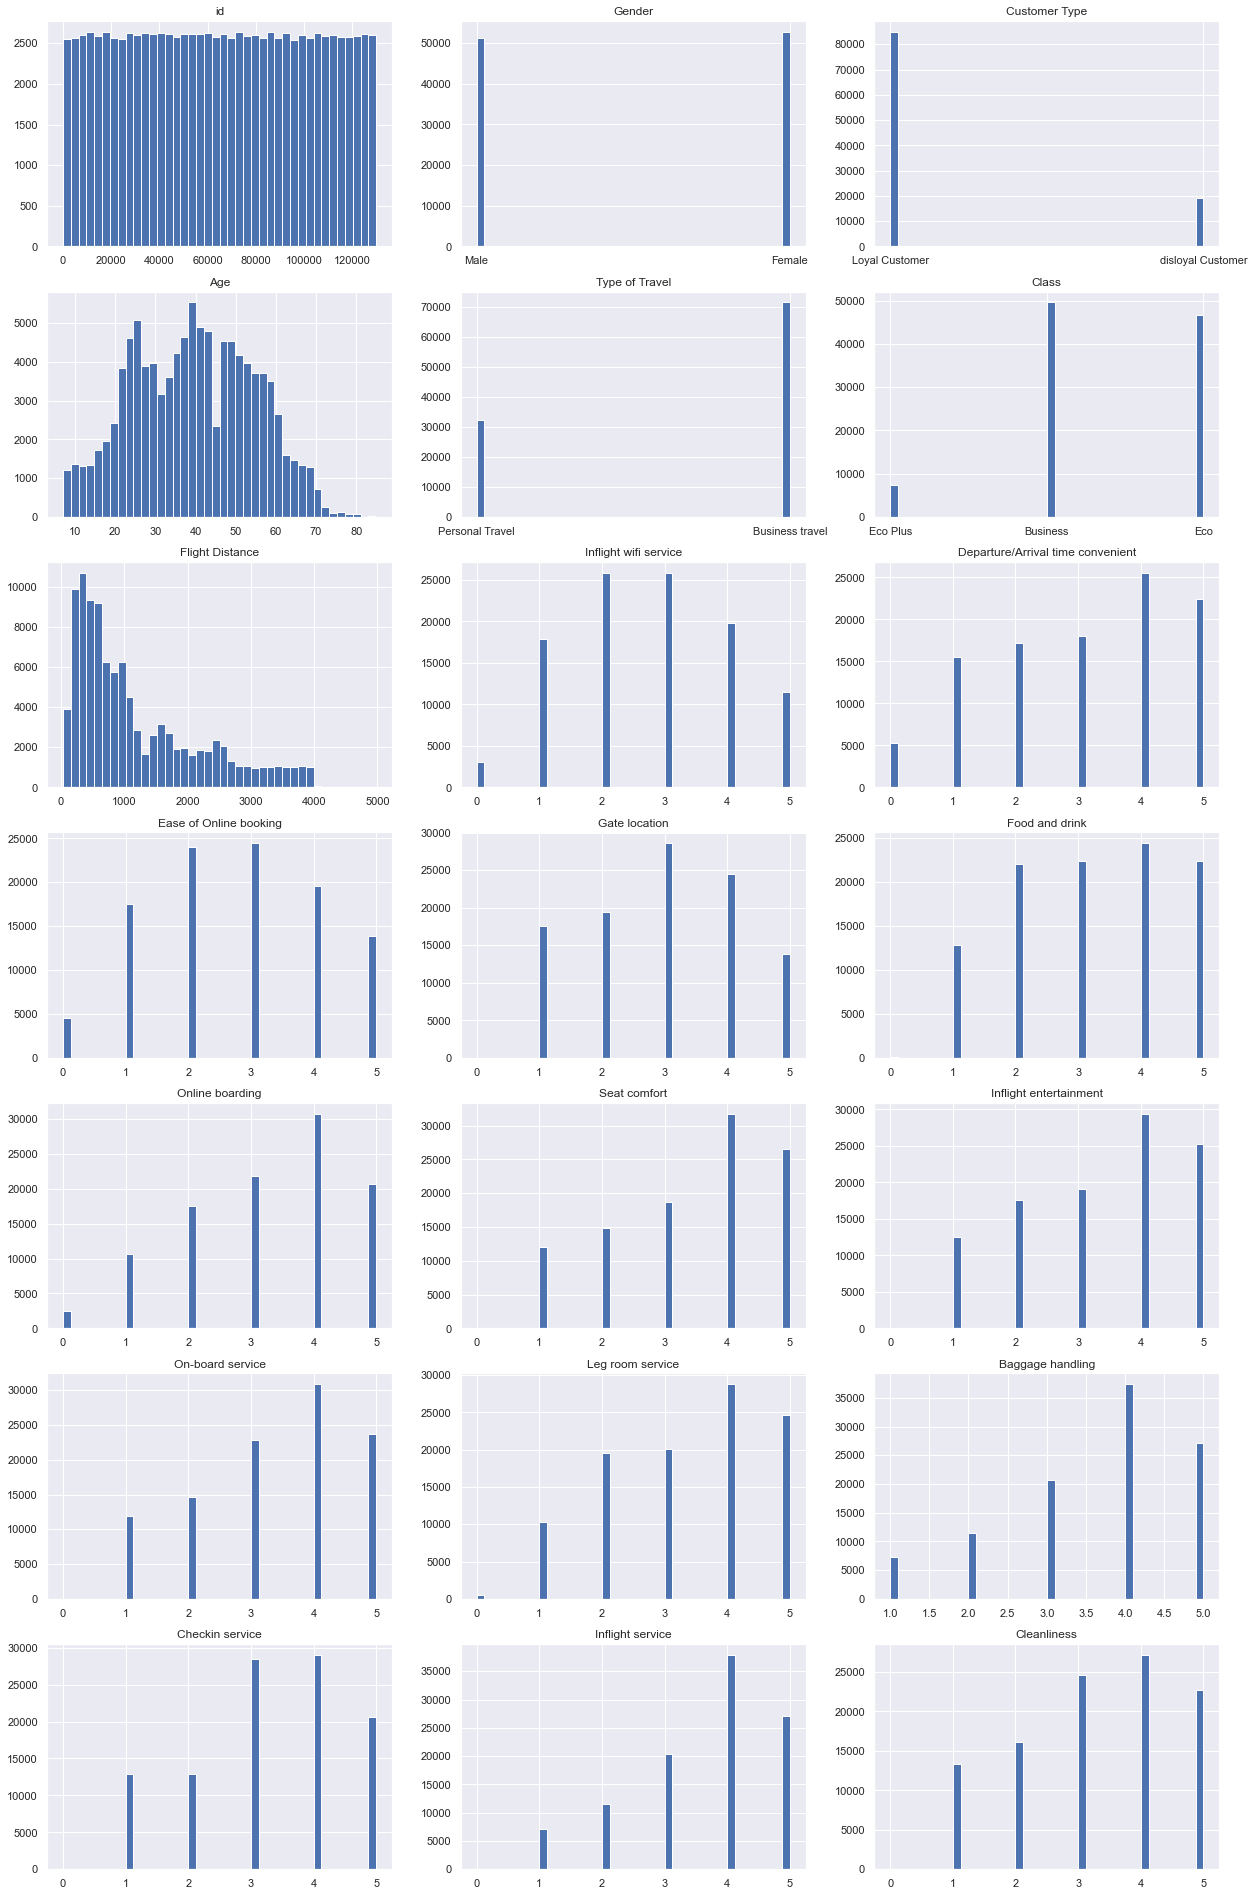

In [339]:
fig, axs = plt.subplots(7,3, figsize=(21,34))

for index, ax in enumerate(axs.flatten()):
    if index < 21:
        column = df.columns[index]
        ax.hist(df[column], bins=40)
        ax.set_title(column)
plt.show()

In [340]:
df['Age'].describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

### Data Cleaning/ Feature Engineering

**Drop unneccessary features**


- Drop ID column (unique, no trends)
- Remove/Impute Nan values (all in one column)
- Bin features in order to more easily detect trends
    - Bin 'Age' , more balanced data
    - Bin 'Flight Distance' into "short, medium, long" range flights 
- Dummy "Arrival/Depature Delay in Minutes" to indicate whether the flight arrived/left on time
   


In [341]:
df.drop(columns=['id'], inplace=True)

In [342]:
conditions= [
    df['Age'].isin(range(7,18)),
    df['Age'].isin(range(18,30)),
    df['Age'].isin(range(30,40)),
    df['Age'].isin(range(40,50)),
    df['Age'].isin(range(50,60)),
    df['Age'].isin(range(60,70)),
    df['Age'].isin(range(70,100)),
]

choices= [
    'Under 18', 
    '19-29',
    '30-39',
    '40-49', 
    '50-59',
    '60-69',
    '70+'
]

df['Age_']= np.select(conditions, choices, 0)

In [343]:
df['Age_'].value_counts()

40-49       23696
19-29       22796
30-39       20659
50-59       19103
60-69        8346
Under 18     7931
70+          1373
Name: Age_, dtype: int64

In [344]:
df['Flight_Length'] = ['Short_Flight' if x <= 800 else 'Long_Flight' if x >=2200 else 'Medium_Flight' for x in df['Flight Distance']]

In [345]:
df['No_Delays'] = [1 if x == 0 else 0 for x in df['Arrival Delay in Minutes']+df['Departure Delay in Minutes']]

In [346]:
df['Departure_Delay'] = [1 if x > 0 else 0 for x in df['Departure Delay in Minutes']]

In [347]:
df['Arrival_Delay'] = [1 if x > 0 else 0 for x in df['Arrival Delay in Minutes']]

In [348]:
df['2_Delays'] = [1 if x == 2 else 0 for x in df['Arrival_Delay']+df['Departure_Delay']]

In [349]:
df.columns.tolist()

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction',
 'Age_',
 'Flight_Length',
 'No_Delays',
 'Departure_Delay',
 'Arrival_Delay',
 '2_Delays']

_____

### Dummy Out Values

In [350]:
#Dummying target variable 
df['satisfaction']= np.where(df['satisfaction']== 'satisfied', 1, 0)

In [351]:
X= df.drop('satisfaction', axis=1)
y= df[['satisfaction']]

In [352]:
y.value_counts(normalize=True)

satisfaction
0               0.566667
1               0.433333
dtype: float64

In [353]:
X_cat= X.select_dtypes('object')
X_cat

,Gender,Customer Type,Type of Travel,Class,Age_,Flight_Length
0,Male,Loyal Customer,Personal Travel,Eco Plus,Under 18,Short_Flight
1,Male,disloyal Customer,Business travel,Business,19-29,Short_Flight
2,Female,Loyal Customer,Business travel,Business,19-29,Medium_Flight
3,Female,Loyal Customer,Business travel,Business,19-29,Short_Flight
4,Male,Loyal Customer,Business travel,Business,60-69,Short_Flight
...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,19-29,Short_Flight
103900,Male,Loyal Customer,Business travel,Business,40-49,Long_Flight
103901,Male,disloyal Customer,Business travel,Business,30-39,Medium_Flight
103902,Female,disloyal Customer,Business travel,Eco,19-29,Medium_Flight


#### Train Test Split Data

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

In [356]:
print("Train percent satistified/dissatisfied: ", y_train.value_counts(normalize=True)[1])
print("Test percent satistified/dissatisfied: ", y_test.value_counts(normalize=True)[1])

Train percent satistified/dissatisfied:  satisfaction
1               0.432784
dtype: float64
Test percent satistified/dissatisfied:  satisfaction
1               0.434978
dtype: float64


_______

____

In [357]:
#Removing object features from X-train and X-test data
X_train_cont= X_train.select_dtypes(exclude=object)
X_test_cont= X_test.select_dtypes(exclude=object)

#Removing numerical features from X_train and X_test data
X_train_cat= X_train.select_dtypes(include=object)
X_test_cat= X_test.select_dtypes(include=object)


In [358]:
X_train_cont.isna().sum().sum()
X_test_cont.isna().sum().sum()

74

In [359]:
from sklearn.impute import SimpleImputer

In [360]:
X_train_imputed= X_train_cont.fillna(0)
X_test_imputed=X_test_cont.fillna(0)

In [361]:
# #Using Simple Imputer to impute some values
# impute= SimpleImputer(missing_values=nan, fill_value=0)
# X_train_imputed= impute.fit_transform(X_train_cont)
# X_test_imputed= impute.transform(X_test_cont)

In [362]:
X_train_imputed

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,No_Delays,Departure_Delay,Arrival_Delay,2_Delays
22672,11,602,1,4,1,1,3,1,3,3,3,4,5,4,4,3,3,2.0,0,1,1,1
13770,45,447,4,4,4,4,5,5,4,2,2,2,2,5,2,5,0,0.0,1,0,0,0
47909,42,956,4,1,1,1,5,1,4,3,3,4,3,5,3,2,0,0.0,1,0,0,0
29822,51,163,3,4,3,3,3,3,4,4,4,3,4,2,4,2,0,0.0,1,0,0,0
52456,33,3218,2,5,5,5,2,2,2,2,4,1,3,3,3,2,0,23.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,39,637,3,5,3,5,3,3,3,3,4,3,2,3,2,3,1,0.0,0,1,0,0
76820,17,646,3,4,3,1,3,3,2,3,5,1,2,4,4,3,0,2.0,0,0,1,0
103694,46,1197,1,2,2,2,1,1,1,4,3,3,3,1,1,1,260,263.0,0,1,1,1
860,37,320,5,5,5,5,5,5,5,5,1,2,4,1,3,5,0,0.0,1,0,0,0


### Normalizing the Data

In [363]:
from sklearn.preprocessing import StandardScaler

#instantiate scaler 
cols= X_train_imputed.columns
ss= StandardScaler()
X_train_scaled= pd.DataFrame(ss.fit_transform(X_train_imputed), columns=cols)
X_test_scaled= pd.DataFrame(ss.transform(X_test_imputed), columns=cols)

In [364]:
# cols = X_train_imputed.columns
# sc = StandardScaler()
# X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=cols)
# X_test_sc = pd.DataFrame(sc.transform(X_test), columns=cols)

In [365]:
pd.DataFrame(X_train_scaled)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,No_Delays,Departure_Delay,Arrival_Delay,2_Delays
0,-1.873741,-0.589265,-1.302010,0.618504,-1.254543,-1.549566,-0.150855,-1.661260,-0.329532,-0.266152,-0.298138,0.491806,1.159738,0.548725,0.305851,-0.214791,-0.308573,-0.338989,-0.916756,1.137374,1.135269,1.422791
1,0.375449,-0.744708,0.957427,0.618504,0.889389,0.802140,1.356500,1.298675,0.428564,-1.017954,-1.074859,-1.030374,-1.379986,1.338868,-1.396362,1.311790,-0.386957,-0.390699,1.090802,-0.879218,-0.880848,-0.702844
2,0.176991,-0.234254,0.957427,-1.344572,-1.254543,-1.549566,1.356500,-1.661260,0.428564,-0.266152,-0.298138,0.491806,-0.533411,1.338868,-0.545255,-0.978081,-0.386957,-0.390699,1.090802,-0.879218,-0.880848,-0.702844
3,0.772365,-1.029519,0.204281,0.618504,0.174745,0.018238,-0.150855,-0.181293,0.428564,0.485650,0.478583,-0.269284,0.313164,-1.031563,0.305851,-0.978081,-0.386957,-0.390699,1.090802,-0.879218,-0.880848,-0.702844
4,-0.418383,2.034207,-0.548864,1.272862,1.604034,1.586041,-0.904533,-0.921276,-1.087627,-1.017954,0.478583,-1.791465,-0.533411,-0.241419,-0.545255,-0.978081,-0.386957,0.203966,-0.916756,-0.879218,1.135269,-0.702844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77923,-0.021467,-0.554165,0.204281,1.272862,0.174745,1.586041,-0.150855,-0.181293,-0.329532,-0.266152,0.478583,-0.269284,-1.379986,-0.241419,-1.396362,-0.214791,-0.360829,-0.390699,-0.916756,1.137374,-0.880848,-0.702844
77924,-1.476825,-0.545140,0.204281,0.618504,0.174745,-1.549566,-0.150855,-0.181293,-1.087627,-0.266152,1.255304,-1.791465,-1.379986,0.548725,0.305851,-0.214791,-0.386957,-0.338989,-0.916756,-0.879218,1.135269,-0.702844
77925,0.441602,0.007434,-1.302010,-0.690214,-0.539899,-0.765664,-1.658211,-1.661260,-1.845723,0.485650,-0.298138,-0.269284,-0.533411,-1.821707,-2.247468,-1.741372,6.406277,6.409165,-0.916756,1.137374,1.135269,1.422791
77926,-0.153772,-0.872071,1.710572,1.272862,1.604034,1.586041,1.356500,1.298675,1.186660,1.237452,-1.851580,-1.030374,0.313164,-1.821707,-0.545255,1.311790,-0.386957,-0.390699,1.090802,-0.879218,-0.880848,-0.702844


### Dummy Categorical Features 

In [366]:
from sklearn.preprocessing import OneHotEncoder

ohe= OneHotEncoder(handle_unknown='error',drop='first')

#transforming categorical training and testing data 
X_train_ohe= ohe.fit_transform(X_train_cat)
X_test_ohe= ohe.transform(X_test_cat)

#converting columns back to Dataframe, use todense() to return numpy matrix 
columns= ohe.get_feature_names(input_features= X_train_cat.columns)
cat_train_ohe= pd.DataFrame(X_train_ohe.todense(), columns= columns)
cat_test_ohe=pd.DataFrame(X_test_ohe.todense(), columns=columns)

#### Combining Transformed Categorical and Contiuous Dataframes back together


In [367]:
X_train_all= pd.concat([pd.DataFrame(X_train_scaled), cat_train_ohe], axis=1)
X_test_all= pd.concat([pd.DataFrame(X_test_scaled), cat_test_ohe], axis=1)

In [368]:
X_train_all

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Age__30-39,Age__40-49,Age__50-59,Age__60-69,Age__70+,Age__Under 18,Flight_Length_Medium_Flight,Flight_Length_Short_Flight
0,-1.873741,-0.589265,-1.302010,0.618504,-1.254543,-1.549566,-0.150855,-1.661260,-0.329532,-0.266152,-0.298138,0.491806,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.375449,-0.744708,0.957427,0.618504,0.889389,0.802140,1.356500,1.298675,0.428564,-1.017954,-1.074859,-1.030374,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.176991,-0.234254,0.957427,-1.344572,-1.254543,-1.549566,1.356500,-1.661260,0.428564,-0.266152,-0.298138,0.491806,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.772365,-1.029519,0.204281,0.618504,0.174745,0.018238,-0.150855,-0.181293,0.428564,0.485650,0.478583,-0.269284,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.418383,2.034207,-0.548864,1.272862,1.604034,1.586041,-0.904533,-0.921276,-1.087627,-1.017954,0.478583,-1.791465,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77923,-0.021467,-0.554165,0.204281,1.272862,0.174745,1.586041,-0.150855,-0.181293,-0.329532,-0.266152,0.478583,-0.269284,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
77924,-1.476825,-0.545140,0.204281,0.618504,0.174745,-1.549566,-0.150855,-0.181293,-1.087627,-0.266152,1.255304,-1.791465,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
77925,0.441602,0.007434,-1.302010,-0.690214,-0.539899,-0.765664,-1.658211,-1.661260,-1.845723,0.485650,-0.298138,-0.269284,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
77926,-0.153772,-0.872071,1.710572,1.272862,1.604034,1.586041,1.356500,1.298675,1.186660,1.237452,-1.851580,-1.030374,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [369]:
X_train= X_train_all
X_test= X_test_all

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [371]:
#instantiating a logistic regression model as baseline model
baseline_model= LogisticRegression(random_state=42)


In [372]:

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(estimator = baseline_model,X=X_train_all, y=y_train, scoring = 'neg_log_loss')

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss



/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

0.3298379714899224

In [373]:
# Run this cell without changes
from sklearn.metrics import log_loss
import numpy as np

log_loss(y_train, np.zeros(len(y_train)))

14.947833547566441

____

In [374]:
df.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_,Flight_Length,No_Delays,Departure_Delay,Arrival_Delay,2_Delays
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,...,4,5,5,25,18.0,0,Under 18,Short_Flight,0,1,1,1
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,...,1,4,1,1,6.0,0,19-29,Short_Flight,0,1,1,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,...,4,4,5,0,0.0,1,19-29,Medium_Flight,1,0,0,0


This dataset has the following columns:

| Variable | Definition | Key |
| -------- | ---------- | --- |
| Satisfaction |  | 0 = Dissatisfied, 1 = Satisfied |
| Gender | M/F | Male, Female |
| Customer Type | Loyal/Disloyal||
| Age | Age in years | |
| Type of Travel | Personal/Business | |
| Class | Ticket class | Eco/Eco Plus/Business|
| Flight Distance | # length of flight(miles) | Short<800/800-2200/Long>2200 | 

| Variable | Definition | Key |
| -------- | ---------- | --- |
| Inflight wifi | wifi when available | 1-5, 5=best 0= n/a | 
| Departure/Arrival time convenient |  | 1-5, 5=best 0= n/a |
| Ease of Online Booking |  |1-5 5=best 0= n/a |
| Gate Location |  |1-5 5=best  |
| Food and Drink |  | rated 1-5, 5 best 0= n/a |
| Online Boarding |  |  rated 1-5, 5 best 0= n/a|
| Seat Comfort |  |rated 1-5, 5 best |
| Inflight Entertainment |  | rated 1-5, 5=best 0= n/a  |
| Onboard Service | | rated 1-5, 5=best  |
| Checkin Service |  | rated 1-5, 5=best |
| Inflight Service | | rated 1-5, 5=best |
| Cleanliness |  |rated 1-5, 5=best  |
| Departure Delay in Minutes |  | |
| Arrival Delay in Minutes |  | |


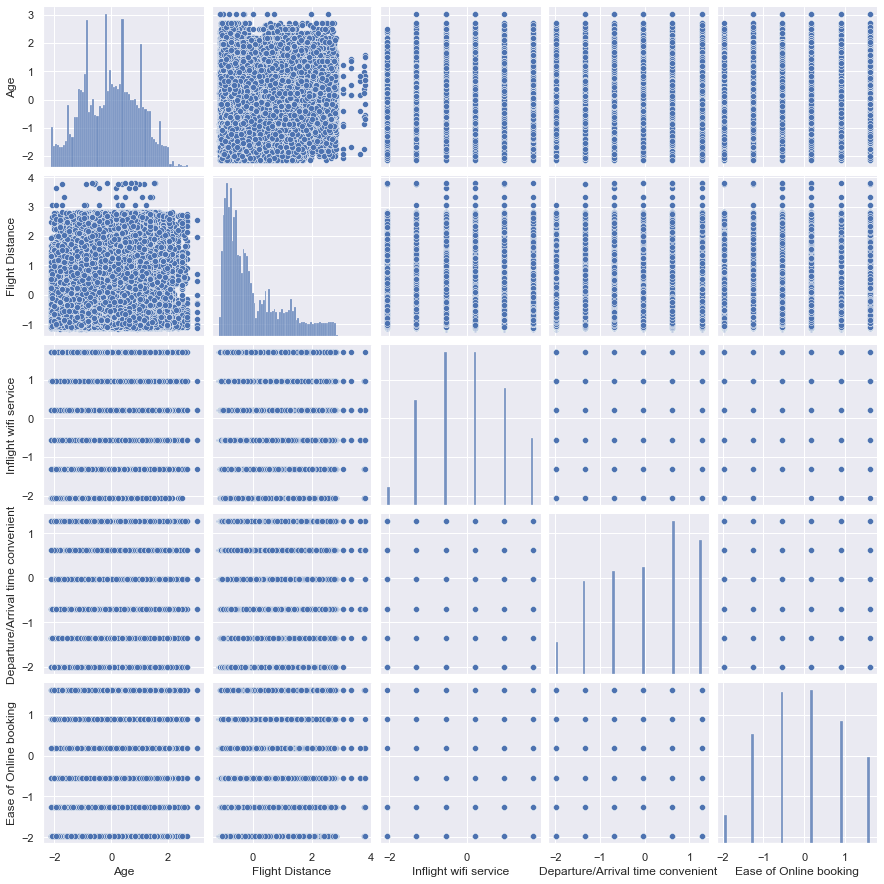

In [375]:
numeric= X_train.select_dtypes(exclude=object).columns.tolist()[:5]
# numeric_df= X_train[numeric]
sns.pairplot(X_train[numeric]);


In [455]:
y_train.shape

(77928, 1)

In [451]:
y_test= np.array(y_test)

_____

### Model 1: Dummy Model

In [376]:
from sklearn.dummy import DummyClassifier

In [377]:
#instantiating the model
dummy_model= DummyClassifier(strategy= 'most_frequent')

In [378]:
#fitting the model
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [379]:
#predicing with model
dm_train= dummy_model.predict(X_train)
dm_test= dummy_model.predict(X_test)
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
print("Cross Validation Results: ", cv_results)

Cross Validation Results:  [0.56723983 0.56723983 0.56717567 0.56721206 0.56721206]


In [380]:
#get accuracy scores
dm_train = accuracy_score(y_train, dm_train)
dm_test = accuracy_score(y_test, dm_test)

In [381]:
#create DataFrame of scores
scores = pd.DataFrame([['Dummy Model', dm_train, dm_test]],
               columns = ['Model', 'Train', 'Test'])
scores

,Model,Train,Test
0,Dummy Model,0.567216,0.565022


Mean accuracy is 56% if we always guess the majority class (Dissatisfied).

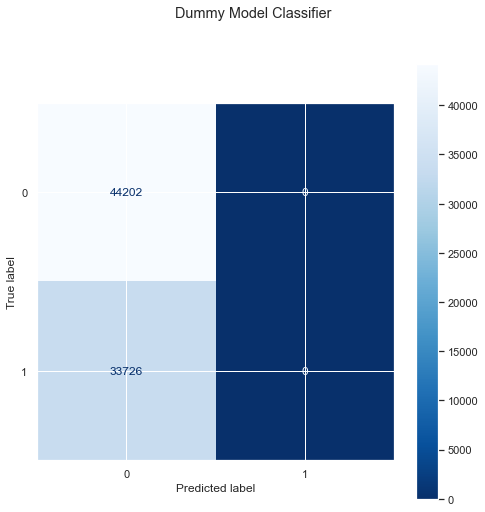

In [382]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model Classifier")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="Blues_r")

plt.savefig('dummy_cm.png');

___

### Model 2: Logistic Regression

In [452]:
from sklearn.linear_model import LogisticRegression

simple_lr_model= LogisticRegression(random_state=42, penalty= "none")
simple_lr_model.fit(X_train, y_train)
simple_lr_model.predict(X_train)

/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 1, 1, ..., 0, 1, 0])

In [384]:
y_train.shape

(77928, 1)

In [385]:
lr_pred_train= simple_lr_model.predict(X_train)
lr_pred_test= simple_lr_model.predict(X_test)

In [386]:

#get accuracy scores
lg_train = accuracy_score(y_train, lr_pred_train)
lg_test = accuracy_score(y_test, lr_pred_test)

In [387]:

#add scores
lg_model = pd.DataFrame([['Logistic Regression', lg_train, lg_test]],
               columns = ['Model', 'Train', 'Test'])
scores = scores.append(lg_model, ignore_index = True)
scores

,Model,Train,Test
0,Dummy Model,0.567216,0.565022
1,Logistic Regression,0.876899,0.876732


In [457]:
#Another Logistic Regression model with penalty of 12(default)
Log_reg2= LogisticRegression(random_state=42, solver= 'liblinear')

Log_reg2.fit(X_train, y_train)
lr2_pred_train= Log_reg2.predict(X_train)
lr2_pred_test= Log_reg2.predict(X_test)

lr2_train= accuracy_score(y_train, lr2_pred_train)
lr2_test= accuracy_score(y_test, lr2_pred_test)

lr2_train, lr2_test

/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.8768606919207473, 0.8766938712657838)

This model actually did worse than the original Logistic Regression Model..
Did not add to the scores DataFrame

____

### Model 3:  Decision Tree

In [388]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix

In [389]:
tree_clf= DecisionTreeClassifier(max_depth=None)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [390]:
acc= metrics.accuracy_score(y_test, y_pred)
print('Accurarcy: ', acc)

Accurarcy:  0.942754850631352


In [391]:

#predict on Decision Tree model
tree_pred_train = tree_clf.predict(X_train)
tree_pred_test = tree_clf.predict(X_test)

#get accuracy score
tree_train = accuracy_score(y_train, tree_pred_train)
tree_test = accuracy_score(y_test, tree_pred_test)

#append scores 
tree_model = pd.DataFrame([['Decision Tree', tree_train, tree_test]],
               columns = ['Model', 'Train', 'Test'])
scores = scores.append(tree_model, ignore_index = True)
scores

,Model,Train,Test
0,Dummy Model,0.567216,0.565022
1,Logistic Regression,0.876899,0.876732
2,Decision Tree,1.000000,0.944102


In [392]:
y_pred= tree_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

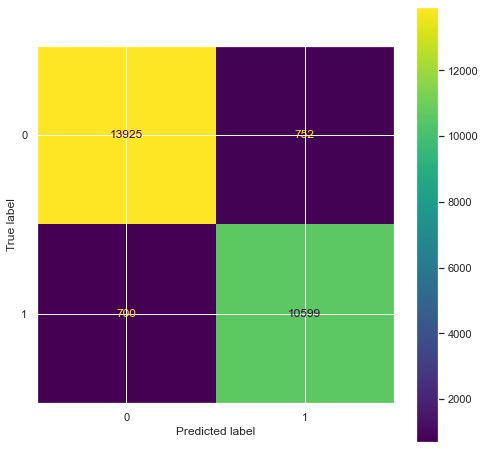

In [393]:
plot_confusion_matrix(tree_clf, X_test, y_test);

In [394]:

for fi, feature in sorted(zip(tree_clf.feature_importances_, X_train.columns.tolist())):
    print(fi, feature)

7.58326065733678e-05 Age__70+
0.00020031959064477085 Age__Under 18
0.00041774030407504324 Age__60-69
0.00046005378993207253 Departure_Delay
0.0005739885649885206 Flight_Length_Short_Flight
0.0008362682134675884 Arrival_Delay
0.0008635146936633818 2_Delays
0.0009527005678603155 Flight_Length_Medium_Flight
0.0010776509886157772 Age__50-59
0.0011144520646562532 No_Delays
0.0013103888947370258 Age__40-49
0.0015309395533848994 Class_Eco Plus
0.001810172972758258 Gender_Male
0.002798040364891281 Age__30-39
0.0036415756420850997 Ease of Online booking
0.004352812470124016 Departure/Arrival time convenient
0.004763991997712033 Food and drink
0.006424148456427341 Departure Delay in Minutes
0.008206973805127896 Arrival Delay in Minutes
0.00858489338487127 On-board service
0.009262732766412464 Cleanliness
0.013246990284518404 Class_Eco
0.016571620690138334 Seat comfort
0.016936424709574738 Inflight service
0.017294827323702928 Gate location
0.0189787761489725 Baggage handling
0.020261641716957206

### Fitting a Random Forest Classifier

In [395]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [396]:
from sklearn.model_selection import GridSearchCV

In [397]:
param_grid = {
    'n_estimators': [300, 700],
    'max_leaf_nodes': [10, 20],
    'criterion': ['gini'],
#     'min_samples_leaf':range(3,5),
    'max_depth': [None, 3,6],
    'max_features': [5,20]}

In [398]:
grid_tree=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)


In [401]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 63.9min finished
/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [None, 3, 6],
                         'max_features': [5, 10, 20, 30],
                         'max_leaf_nodes': [10, 20],
                         'n_estimators': [100, 1000]},
             scoring='f1', verbose=1)

In [402]:
grid_tree.best_score_

0.920167139640526

In [403]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 30,
 'max_leaf_nodes': 20,
 'n_estimators': 1000}

In [404]:
grid_tree.best_estimator_

RandomForestClassifier(max_features=30, max_leaf_nodes=20, n_estimators=1000)

In [405]:
from sklearn import metrics

In [406]:
rfc= RandomForestClassifier(n_estimators=300, max_depth=None, max_features=20)

rfc.fit(X_train,y_train)

rfc_preds= rfc.predict(X_test)

rfc_accuracy= metrics.accuracy_score(y_test, rfc_preds)
rfc_precision= metrics.precision_score(y_test, rfc_preds)
rfc_accuracy, rfc_precision                  

<ipython-input-406-e5f9743bb975>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


(0.9630813058207576, 0.9728370221327968)

In [407]:
rfc= RandomForestClassifier(n_estimators=300, max_depth=None, max_features=10)

rfc.fit(X_train,y_train)

rfc_preds= rfc.predict(X_test)

rfc_accuracy= metrics.accuracy_score(y_test, rfc_preds)
rfc_precision= metrics.precision_score(y_test, rfc_preds)
rfc_accuracy, rfc_precision     

<ipython-input-407-1b1bb4e44575>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


(0.9625423467816446, 0.9732355637030248)

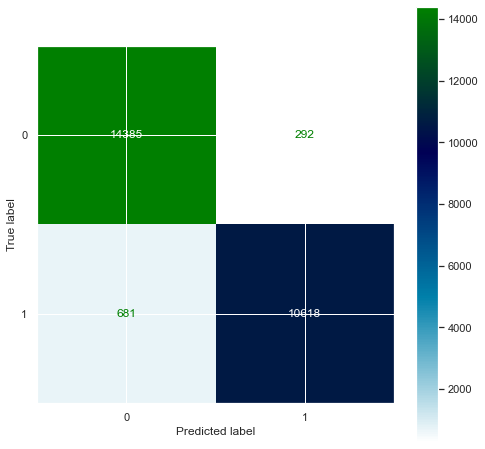

In [437]:
plot_confusion_matrix(rfc, X_test, y_test, cmap="ocean_r")
plt.savefig('cm_2.png')

In [ ]:
#instantiate with best params model need to run again
gs_rfc = grid_tree.best_estimator_

In [ ]:
#predict on GC Random Forest Classifier
gs_rfc_pred_train = gs_rfc.predict(X_train)
gs_rfc_pred_test = gs_rfc.predict(X_test)

In [ ]:
#get accuracy score
gs_rfc_train = accuracy_score(y_train, gs_rfc_pred_train)
gs_rfc_test = accuracy_score(y_test, gs_rfc_pred_test)

In [ ]:
#add scores to df
gs_rf_model = pd.DataFrame([['Grid Search Random Forest', gs_rfc_train, gs_rfc_test]],
               columns = ['Model', 'Train', 'Test'])
scores = scores.append(gs_rf_model, ignore_index = True)
scores

In [ ]:
scores


In [ ]:
feat_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, rfc.feature_importances_)
}
feat_import

In [ ]:
len(X_test)

In [ ]:
df.columns

In [ ]:

plt.figure(figsize = (10, 8))
sns.set_style("white")
sns.kdeplot(df.query('satisfaction == 1')['Age'], shade = True, label = 'Satisfied', alpha = 0.5)
sns.kdeplot(df.query('satisfaction == 0')['Age'], shade = True, label = "Disatisfied/Neutral", alpha = 0.5)
plt.xlabel('AGE')
plt.legend(loc = 2)
plt.title('Affect of Age on Satisfaction')
plt.show()

In [ ]:
df.columns

In [ ]:
g = sns.catplot(x="Type of Travel", y="satisfaction", col="Class",data=df, saturation=.5, kind="bar", ci=None, aspect=.6)
g.set_axis_labels("", "Satisfcation Rate")
g.set_xticklabels(["Personal", "Business"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)
g.palette="Set10"


In [ ]:
X_train_cat.columns.tolist()

In [ ]:
df.select_dtypes(exclude=object)

In [ ]:
sns.set_style('whitegrid')
x = df['Seat comfort']
y = df['satisfaction']
fig, ax = plt.subplots()
clrs = ['blue' if (x < 5) else 'grey' for x in x]
ax = sns.barplot(x=x,y=y, data=df, palette= clrs)
ax.ticklabel_format(style='plain', axis='y')
plt.show()
plt.savefig('Seatcomfort.png');

In [ ]:
df.hist()